In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

**Задание 1.1** (5/8 балла): Реализуйте класс MSELoss

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        n_objects = X.shape[0]
        pred = X.dot(w)
        return np.mean((y-pred)**2)
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        n_objects = X.shape[0]
        pred = X.dot(w)
        return -2/n_objects*X.T.dot(y-pred)

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


**Задание 1.2** (5/8 балла): Реализуйте функцию gradient_descent

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    w = w_init.copy()
    weights = []
    for i in range(n_iterations):
        grad = loss.calc_grad(X, y, w)
        w -= lr * grad
        weights.append(w.copy())
    return weights

In [ ]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.26258214351938
0.8670644395649493


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла)**

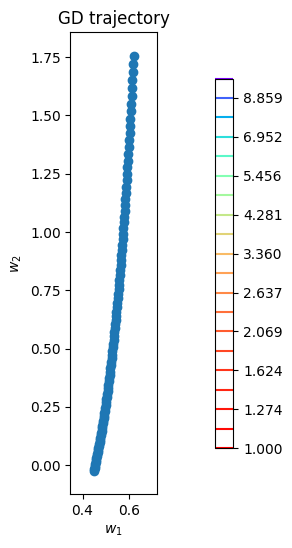

Start Loss: 412.5355, Final Loss: 27.0791 lr=0.0001


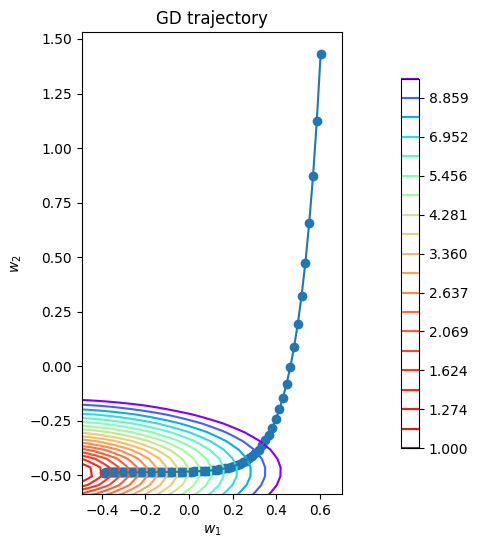

Start Loss: 304.4618, Final Loss: 1.4575 lr=0.001


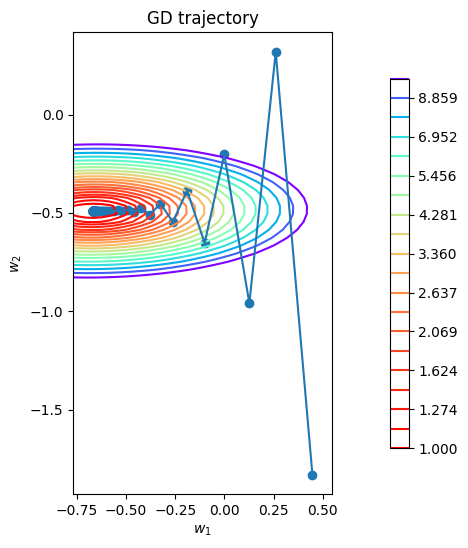

Start Loss: 155.2626, Final Loss: 0.8671 lr=0.01


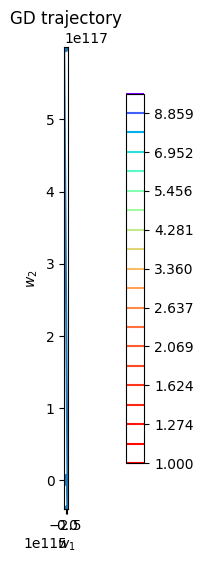

Start Loss: 91817.0289, Final Loss: 2867494833868979087436190385245761569525134376079648944822122723477672034968295552824640918308715859138034497616399601326106579365727450721631985819661301974114893702338446489756004598096052436217110844353405979093674144526244534795894784.0000 lr=0.1


In [ ]:
lrs = [0.0001, 0.001, 0.01,0.1]
for lr in lrs:
    w_list = gradient_descent(w_init, X, y, MSELoss(), lr, 100)
    plot_gd(w_list, X, y, MSELoss())
    print(f"Start Loss: {MSELoss().calc_loss(X, y, w_list[0]):.4f}, Final Loss: {MSELoss().calc_loss(X, y, w_list[-1]):.4f} lr={lr}")

По полученным результатам видим, что **лучший lr = 0.01**, при нем Final loss 0.8671, что являетсяя наилучшим результатом, траектория немного скачет, но это не помешало показать отличный результат. Так же хорошо себя показал lr = 0.001, с Final Loss 1.4575, траектория ровная.
lr = 0.0001 уже значительно отличается от рассмотренных, траектория гипер ровная, двигаемся микро шагами, но показатель потерь не радует, так же как и показатели при lr = 0.1, при таком размере шага даже не рисуется график, модель выдает гиганский loss.

**Задание 1.4** (5/8 балла): Реализуйте функцию stochastic_gradient_descent

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    w = w_init.copy()
    weights = []
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(X_batch, y_batch, w)
        w -= lr*grad
        weights.append(w.copy())
    return weights

**Задание 1.5**

LR: 0.0001, Batch Size: 1


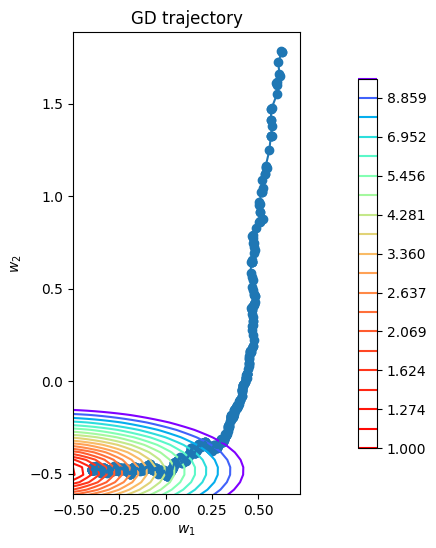

LR: 0.0001, Batch Size: 10


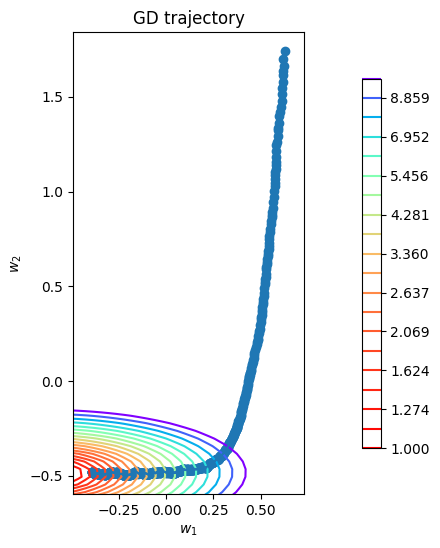

LR: 0.0001, Batch Size: 50


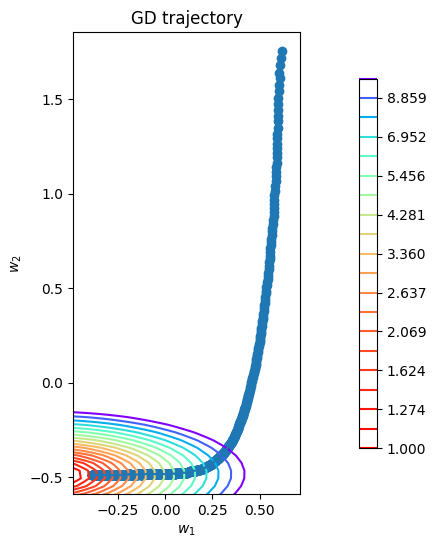

LR: 0.0001, Batch Size: 100


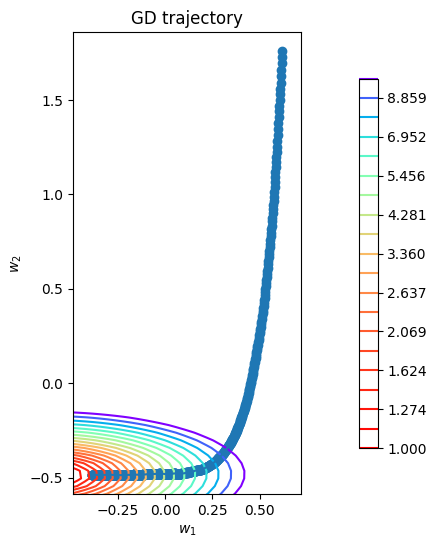

LR: 0.001, Batch Size: 1


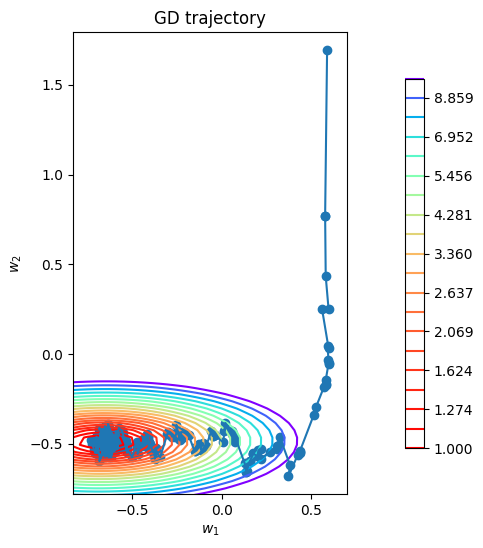

LR: 0.001, Batch Size: 10


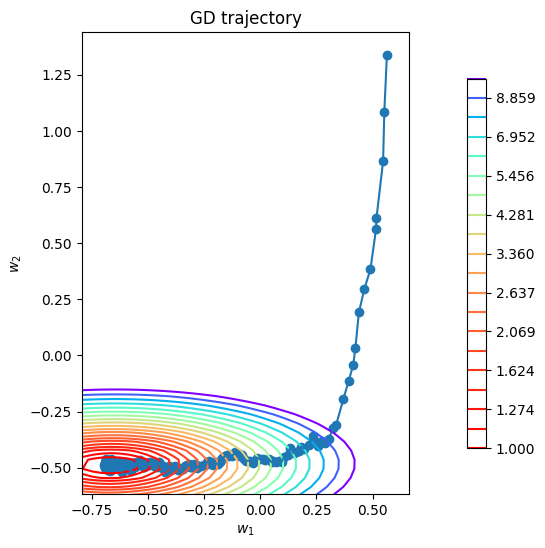

LR: 0.001, Batch Size: 50


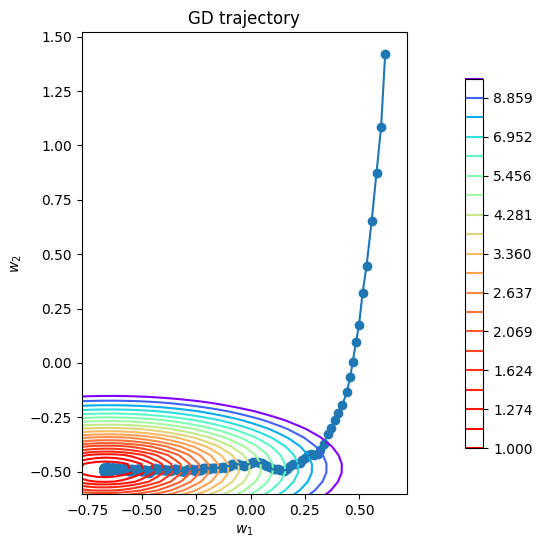

LR: 0.001, Batch Size: 100


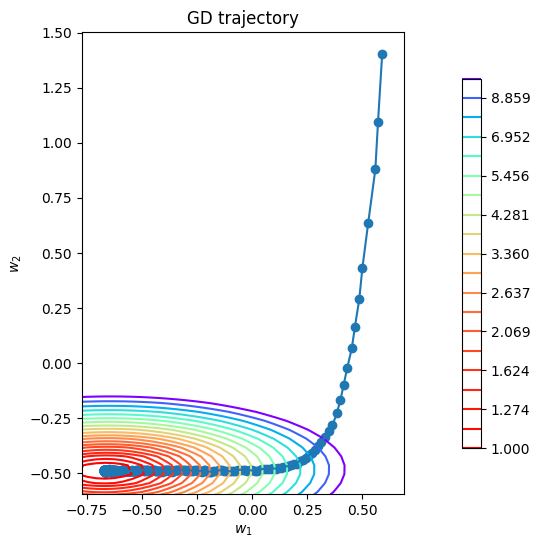

LR: 0.01, Batch Size: 1


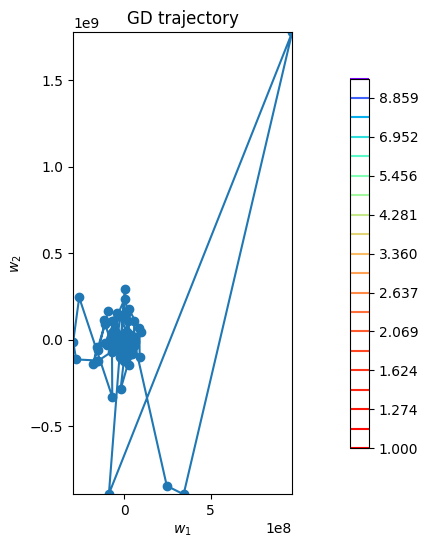

LR: 0.01, Batch Size: 10


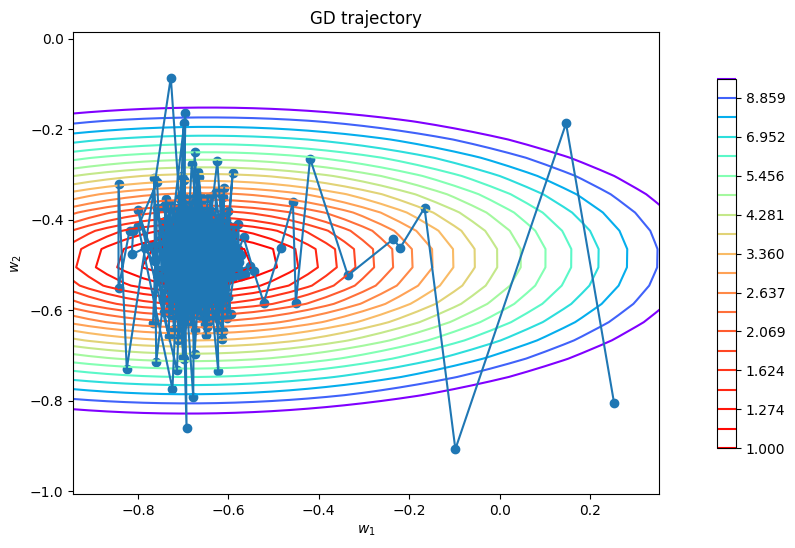

LR: 0.01, Batch Size: 50


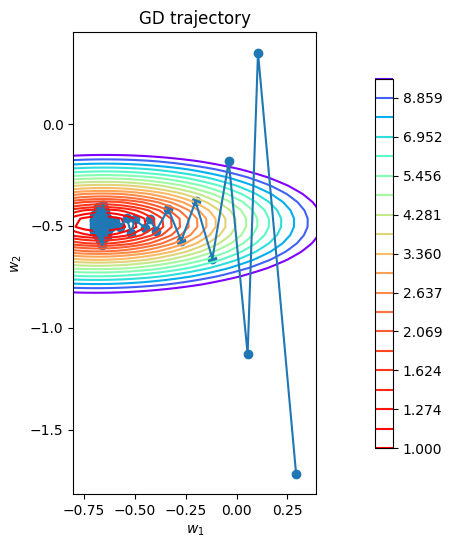

LR: 0.01, Batch Size: 100


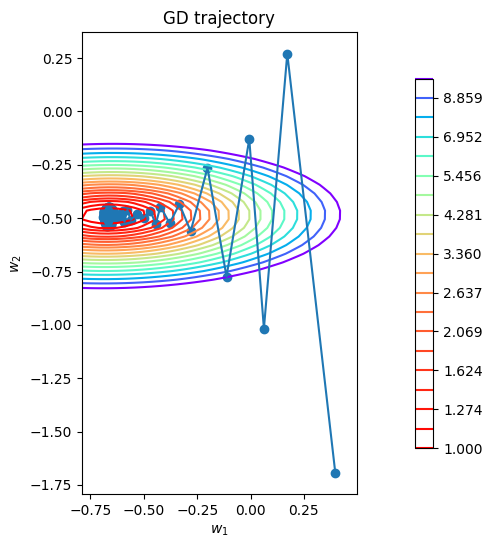

In [ ]:
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [1, 10, 50, 100]

for lr in learning_rates:
    for batch_size in batch_sizes:
        w_list = stochastic_gradient_descent(w_init, X, y, MSELoss(), lr, batch_size, 1000)
        print(f"LR: {lr}, Batch Size: {batch_size}")
        plot_gd(w_list, X, y, MSELoss())

Видно зависимость - чем меньше шаг, тем меньше размер batch'а мы можем брать. При больших шагах и маленьких batch'ах траекторя становится "пьяной", видны очень большие скачки не туда, на выходе имеем плохую точность.
Отличия от обычного градиентного спуска таковы, что мы можем брать меньше данных, при той же величине шага и при этом показывать схожие по точности результаты, тем самым получаем более оптимизированную модель, под большее количество данных.

**Задание 1.6**

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    w = w_init.copy()
    weights_history = []
    s0 = 1.0
    for t in range(1, n_iterations + 1):
        ad_lr = lr * (s0 / (s0+t)) ** p
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(X_batch, y_batch, w)
        w -= ad_lr * grad
        weights_history.append(w.copy())

    return weights_history


**Задание 1.7**

p=0.1


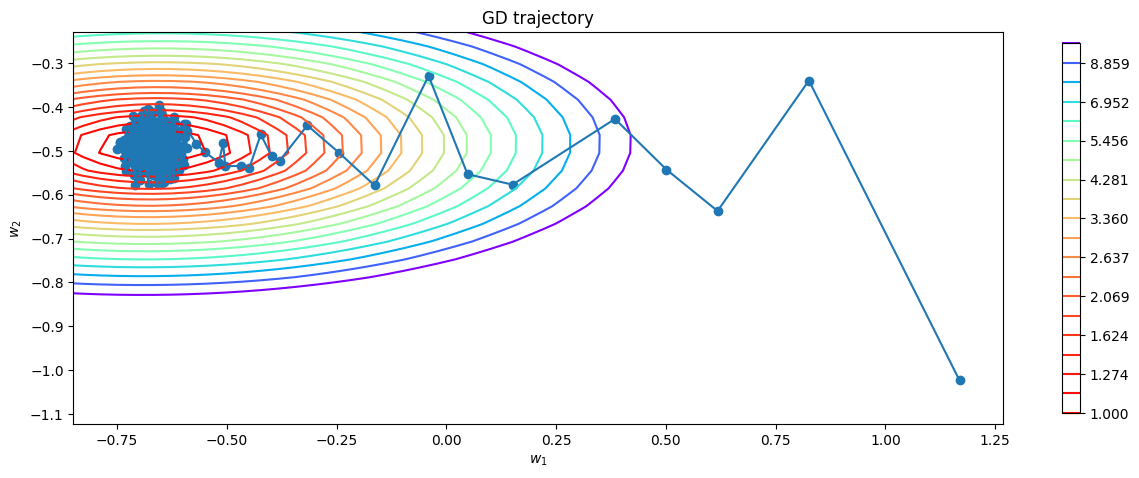

p=0.3


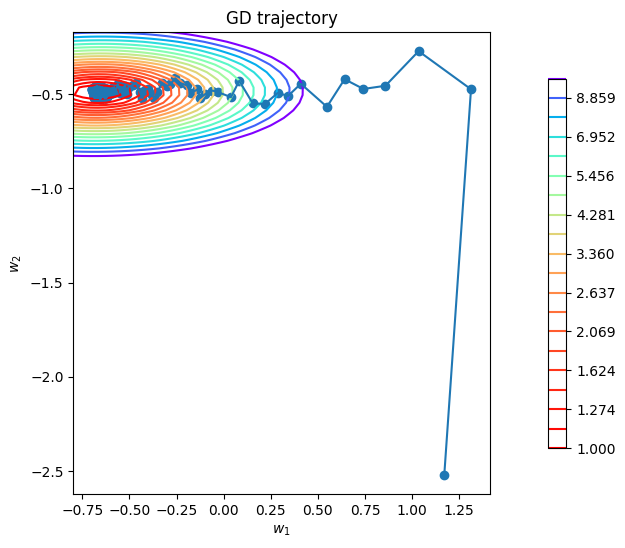

p=0.5


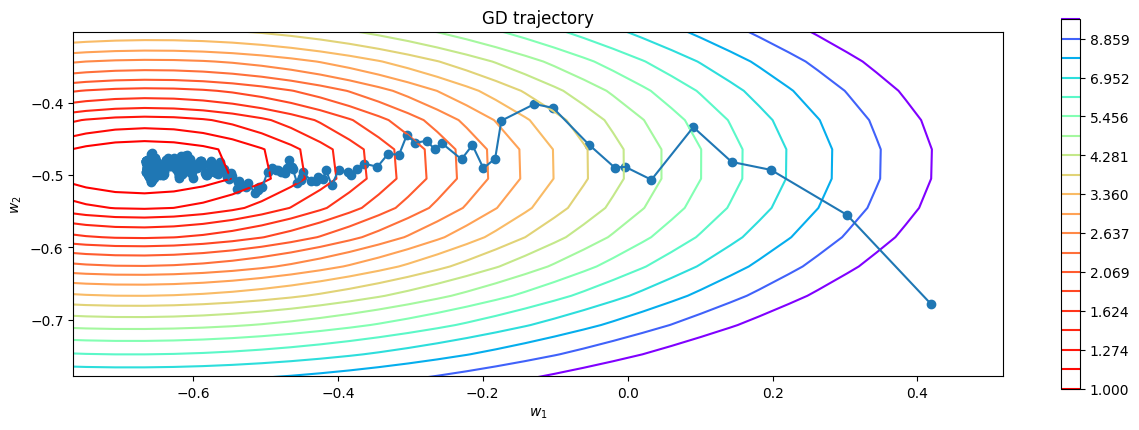

p=0.7


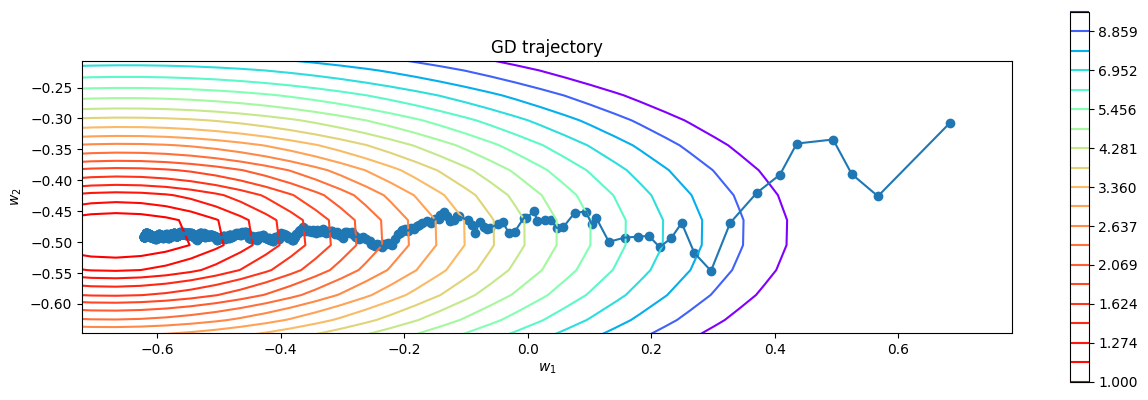

p=1.0


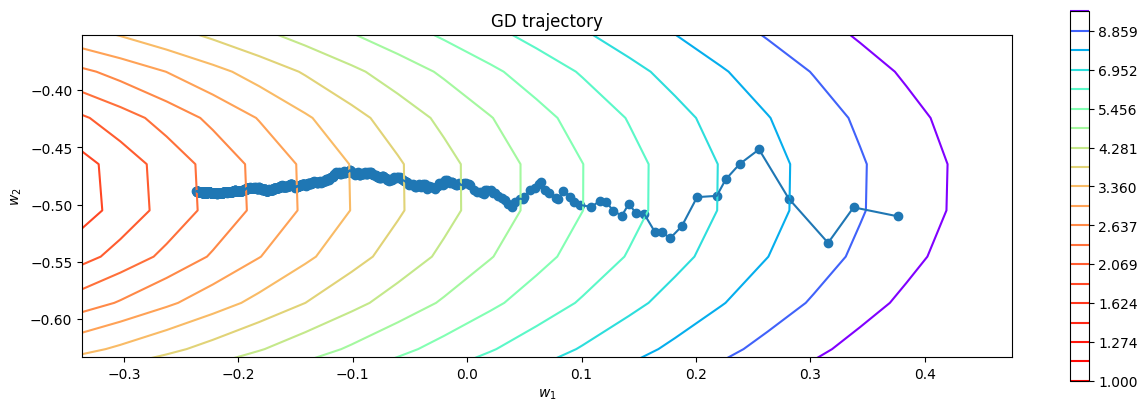

In [ ]:
ps = [0.1, 0.3, 0.5, 0.7, 1.0]
lr = 0.01
batch_size = 10
for i in ps:
    w_list = stochastic_gradient_descent(w_init, X, y, MSELoss(), lr, batch_size, i, 1000)
    print(f"p={i}")
    plot_gd(w_list, X, y, MSELoss())

При малом p = 0.1 наша модель быстрее подбирается к центру, но ей очень тяжело попасть непосредсвенно в центр, она как бы скачет вокруг.
При бОльших p (0.5, 0.7) результат уже радует, модель постепенно достигает центра с меньшими скачками в "никуда". **Наиболее точная модель при p = 0.7**.
Что касает p = 1.0, то тут видим, что мы не доходим до центра, и останавливаемся неподалеку, точность хромает.

**Задание 1.8**

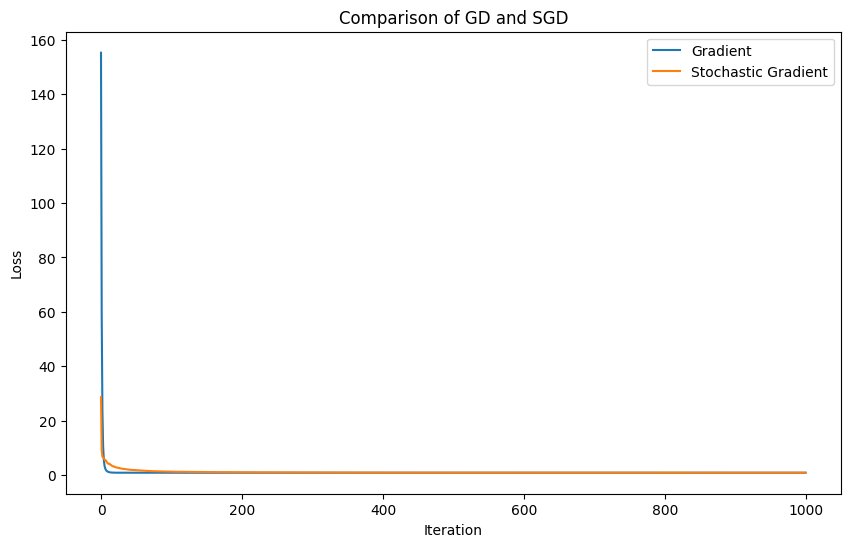

In [ ]:
lr = 0.01
n_iterations = 1000
p = 0.7
gd_weights = gradient_descent(w_init, X, y, MSELoss(), lr, n_iterations)
sgd_weights = stochastic_gradient_descent(w_init, X, y, MSELoss(), lr, 10, p, n_iterations)
gd_loss = [MSELoss().calc_loss(X, y, w) for w in gd_weights]
sgd_loss = [MSELoss().calc_loss(X, y, w) for w in sgd_weights]
plt.figure(figsize=(10, 6))
plt.plot(gd_loss, label='Gradient')
plt.plot(sgd_loss, label='Stochastic Gradient')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Comparison of GD and SGD')
plt.legend()
plt.show()

Видим приемущество SGD в самом начале, значение Loss гораздо ниже чем у GD на первых шагах, далее график сходится.
Это нам говорит о том, что для достижения желаемой точности нам можно тратить меньшее количество итерации, тем самым SGD выгоднее использовать на большом объеме данных.

**Задание 2.1**

In [4]:
class LinearRegression:
    def __init__(self, loss, lr=0.01):
        self.loss = loss
        self.lr = lr
        self.w = None

    def fit(self, X, y, n_iterations=10000):
            self.w = np.random.rand(X.shape[1])
            for i in range(n_iterations):
                grad = self.loss.calc_grad(X, y, self.w).astype(float)
                self.w -= self.lr * grad
    def predict(self, X):
            return np.dot(X, self.w)

In [5]:
linear_regression = LinearRegression(MSELoss())

**Задание 2.2**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)

X_raw = X_raw[~X_raw[25].isna()]
y = X_raw[25].astype(float)
X_raw = X_raw.drop(25, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=52)

numeric = SimpleImputer(strategy='mean')
categorical = SimpleImputer(strategy='most_frequent')

numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

X_train[numeric_columns] = numeric.fit_transform(X_train[numeric_columns])
X_train[categorical_columns] = categorical.fit_transform(X_train[categorical_columns])

X_test[numeric_columns] = numeric.transform(X_test[numeric_columns])
X_test[categorical_columns] = categorical.transform(X_test[categorical_columns])

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

X_train = pd.get_dummies(X_train, columns=categorical_columns)
X_test = pd.get_dummies(X_test, columns=categorical_columns)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


**Задание 2.3**

In [14]:
X_train = X_train.to_numpy().astype(float)
y_train = y_train.to_numpy().astype(float)
model = LinearRegression(loss=MSELoss(), lr=0.01)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

**Задание 2.4**

In [8]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print("MSE on training data:", mean_squared_error(y_train, train_predictions))
print("MSE on testing data:", mean_squared_error(y_test, test_predictions))

MSE on training data: 2030438.755237162
MSE on testing data: 6834307.077233651


**Задание 2.5**

In [15]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        """
        n = len(y)
        predictions = X.dot(w)
        errors = predictions - y
        mse_loss = np.mean(errors**2)
        l2 = self.coef * np.sum(w[:-1]**2)
        return mse_loss + l2

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        """
        n = len(y)
        predictions = X.dot(w)
        errors = predictions - y
        gradient = (2/n) * X.T.dot(errors)
        w_reg = np.copy(w)
        w_reg[-1] = 0
        gradient += 2 * self.coef * w_reg
        return gradient


**Задание 2.6**

In [16]:
linear_regression = LinearRegression(loss=MSEL2Loss(0.01), lr=0.01)
linear_regression.fit(X_train, y_train)
predictions = linear_regression.predict(X_test)

train_mse = mean_squared_error(y_train, linear_regression.predict(X_train))
test_mse = mean_squared_error(y_test, predictions)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train MSE: 2874804.3124277657
Test MSE: 5771053.186533342


Видим, что на обучающей выборке на MSE2Loss (2874804) хуже чем у обычного MSE (2030438). Но, на тестевой выборке все по-другому,  MSE2Loss показывает результат ощутимо лучше (5771030), чем MSE (6834320). **Можно сделать вывод, что модель точнее на тесте при использовании MSE2Loss**

**Задание 2.7**

In [17]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float):
        """
        Инициализирует HuberLoss с заданным порогом eps.
        :param eps: пороговое значение для перехода между квадратичной и линейной потерями.
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Вычисляет Huber Loss.
        :param X: Матрица признаков размером (n_objects, n_features)
        :param y: Вектор истинных значений размером (n_objects,)
        :param w: Вектор весов модели размером (n_features,)
        :return: Скалярное значение функции потерь.
        """
        errors = y-X.dot(w)
        cond = np.abs(errors) <= self.eps
        squared_loss = 0.5*errors**2
        linear_loss = self.eps*(np.abs(errors)-0.5*self.eps)
        return np.where(cond, squared_loss, linear_loss).mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Вычисляет градиент функции потерь Huber Loss.
        :param X: Матрица признаков размером (n_objects, n_features)
        :param y: Вектор истинных значений размером (n_objects,)
        :param w: Вектор весов модели размером (n_features,)
        :return: Вектор градиента размером (n_features,)
        """
        errors = y - X.dot(w)
        cond = np.abs(errors) <= self.eps
        gradients = np.where(cond, errors, self.eps * np.sign(errors))
        return -np.dot(X.T, gradients) / len(y)

**Задание 2.8**

In [18]:
mse_model = LinearRegression(loss=MSELoss(), lr=0.01)
mse_model.fit(X_train, y_train)
mse_train_predictions = mse_model.predict(X_train)
mse_test_predictions = mse_model.predict(X_test)

huber_model = LinearRegression(loss=HuberLoss(eps=3900), lr=0.01)
huber_model.fit(X_train, y_train)
huber_train_predictions = huber_model.predict(X_train)
huber_test_predictions = huber_model.predict(X_test)

print("MSE Model - Train:", mean_squared_error(y_train, mse_train_predictions))
print("MSE Model - Test:", mean_squared_error(y_test, mse_test_predictions))
print("Huber Model - Train:", mean_squared_error(y_train, huber_train_predictions))
print("Huber Model - Test:", mean_squared_error(y_test, huber_test_predictions))

MSE Model - Train: 2030426.9010255462
MSE Model - Test: 6834192.826322493
Huber Model - Train: 2584291.293866954
Huber Model - Test: 5671711.255386534


**Задание 3**


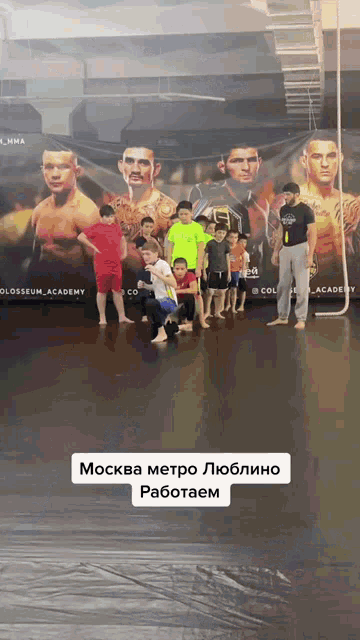